In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.8MB/s eta 0:00:011
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 46.6MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 48.0MB/s ta 0:00:01
    100% |████████████████████████████████| 10.4MB 4.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 7.1MB 6.9MB/s eta 0:00:011
    100% |████████████████████████████████| 194kB 56.7MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 36.7MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built holidays ujson
  Found existing installation: python-dateut

In [3]:
# !pip install gluonts=="0.4.1"

In [3]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [4]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar
# from utils_gluonts11_deepstate import deep_state


INFO:root:Using CPU


In [5]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_hourly', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_finance', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'm4_weekly_domain', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_demographic', 'm4_yearly_domain', 'm4_yearly_finance', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro', 'm4_yearly_other']


#### Note

In SageMaker data are saved into the following folders (example shows m4_weekly):

```
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json
```

In [6]:
dataname = "m4_monthly_micro"
dataset = get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_micro.


In [7]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [8]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'target': array([ 3396.89,  3257.99,  3158.49,  3176.81,  3157.27,  3108.64,
         3063.8 ,  3098.17,  3106.87,  3096.37,  3193.22,  3230.99,
         3329.66,  3278.32,  3228.59,  3196.76,  3178.63,  3210.04,
         3236.73,  3281.7 ,  3298.  ,  3292.78,  3283.29,  3283.5 ,
         3266.97,  3238.75,  3228.64,  3275.36,  3289.36,  3304.42,
         3386.32,  3449.33,  3480.2 ,  3488.49,  3489.8 ,  3514.08,
         3509.89,  3507.85,  3535.43,  3557.9 ,  3569.59,  3581.05,
         3568.18,  3565.69,  3606.74,  3631.37,  3675.48,  3681.79,
         3677.63,  3697.65,  3706.94,  3697.  ,  3702.05,  3703.11,
         3677.1 ,  3703.61,  3716.26,  3688.9 ,  3665.12,  3615.87,
         3594.32,  3593.57,  3573.24,  3569.07,  3599.18,  3554.01,
         3484.06,  3424.86,  3433.06,  3373.05,  3448.19,  3465.57,
         3465.6 ,  3485.96,  3497.15,  3530.69,  3557.28,  3557.31,
         3504.81,  3521.84,  3527.23,  3572.4 ,  362

## Plot Series

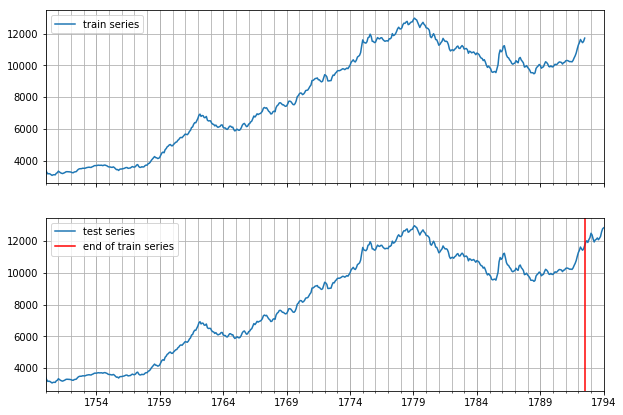

In [9]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [10]:
print("start:", dict(train_entry)["start"])
print("target:", dict(train_entry)["target"][:7])
print("feat_static_cat:", dict(train_entry)["feat_static_cat"])
print("length:", len(dataset.train))

start: 1750-01-31 00:00:00
target: [3396.89 3257.99 3158.49 3176.81 3157.27 3108.64 3063.8 ]
feat_static_cat: [1]
length: 10975


In [11]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepstate import DeepStateEstimator

INFO:root:Using CPU


In [12]:
#########################
### deepstate wrapper ###

# data = "m4_yearly_other"
# seed = 44
# epochs = 500
# num_batches = 100
# batch_size = 32

def deepstate(dataname, seed=42, epochs=100, num_batches=50):
    
    mx.random.seed(seed)
    np.random.seed(seed)

    dataset = get_dataset(dataname, regenerate=False)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
        )

    cardinality = int(dataset.metadata.feat_static_cat[0].cardinality)
    estimator = DeepStateEstimator(
        trainer=trainer,
        cardinality=[cardinality],
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True,
        )

    predictor=estimator.train(dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
            dataset.test, predictor=predictor, num_samples=100
        )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = num_batches    

    df = pd.DataFrame([output])
    return df

# Yearly

## `m4_yearly_demographic`

## `m4_yearly_finance`

In [25]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df=deepstate("m4_yearly_finance", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepStateTrainingNetwork: 355299


Seed: 42


100%|██████████| 100/100 [00:01<00:00, 64.26it/s, avg_epoch_loss=0.0893]
INFO:root:Epoch[0] Elapsed time 1.559 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.089251
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.14it/s, avg_epoch_loss=0.00816]
INFO:root:Epoch[1] Elapsed time 1.491 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.008159
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.95it/s, avg_epoch_loss=-.421]
INFO:root:Epoch[2] Elapsed time 1.496 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.420713
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.55it/s, avg_epoch_loss=-.748]
INFO:root:Epoch[3] Elapsed time 1.441 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.748424
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.17it/s, avg_epoch_loss=-1.25]
INFO:root:Epoch[4] Elapsed time 1.448 seconds
I

100%|██████████| 100/100 [00:01<00:00, 68.73it/s, avg_epoch_loss=-2.6]
INFO:root:Epoch[37] Elapsed time 1.459 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.600908
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.66it/s, avg_epoch_loss=-2.25]
INFO:root:Epoch[38] Elapsed time 1.480 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.249427
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.88it/s, avg_epoch_loss=-2.57]
INFO:root:Epoch[39] Elapsed time 1.475 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.570983
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.76it/s, avg_epoch_loss=-2.33]
INFO:root:Epoch[40] Elapsed time 1.458 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.325463
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.60it/s, avg_epoch_loss=-2.6]
INFO:root:Epoch[41] Elapsed time 1.462

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-2.833722
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.30it/s, avg_epoch_loss=-2.87]
INFO:root:Epoch[74] Elapsed time 1.445 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.870889
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.95it/s, avg_epoch_loss=-2.86]
INFO:root:Epoch[75] Elapsed time 1.498 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.860736
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.09it/s, avg_epoch_loss=-2.86]
INFO:root:Epoch[76] Elapsed time 1.471 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.861562
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.07it/s, avg_epoch_loss=-2.86]
INFO:root:Epoch[77] Elapsed time 1.452 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.861517
INFO:root:Epoch[78] Learning rate is 0.0005

100%|██████████| 100/100 [00:01<00:00, 67.59it/s, avg_epoch_loss=-3.17]
INFO:root:Epoch[110] Elapsed time 1.484 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.166305
INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.02it/s, avg_epoch_loss=-3.05]
INFO:root:Epoch[111] Elapsed time 1.450 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.049878
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.38it/s, avg_epoch_loss=-3.21]
INFO:root:Epoch[112] Elapsed time 1.443 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.212323
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.79it/s, avg_epoch_loss=-3.09]
INFO:root:Epoch[113] Elapsed time 1.455 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.090267
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.33it/s, avg_epoch_loss=-3.18]
INFO:root:Epoch[114]

INFO:root:Epoch[146] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.24it/s, avg_epoch_loss=-3.34]
INFO:root:Epoch[146] Elapsed time 1.467 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.342535
INFO:root:Epoch[147] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.36it/s, avg_epoch_loss=-3.67]
INFO:root:Epoch[147] Elapsed time 1.443 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.671386
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.12it/s, avg_epoch_loss=-3.4]
INFO:root:Epoch[148] Elapsed time 1.515 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.398612
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.35it/s, avg_epoch_loss=-3.66]
INFO:root:Epoch[149] Elapsed time 1.465 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.662430
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 67.9

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-3.748140
INFO:root:Loading parameters from best epoch (171)
INFO:root:Epoch[182] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 66.02it/s, avg_epoch_loss=-3.8]
INFO:root:Epoch[182] Elapsed time 1.517 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-3.803285
INFO:root:Epoch[183] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 67.68it/s, avg_epoch_loss=-3.73]
INFO:root:Epoch[183] Elapsed time 1.480 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-3.732604
INFO:root:Epoch[184] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 67.36it/s, avg_epoch_loss=-3.84]
INFO:root:Epoch[184] Elapsed time 1.487 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-3.839133
INFO:root:Epoch[185] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 66.89it/s, avg_epoch_loss=-3.77]
INFO:root:Epoch[185] Elapsed time 1.497 seconds
INFO:root:Epoch[185] Evaluation me

       MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.171406  0.173779  156.566103            0.169558            0.234001   

   seed  epochs  num_batches  
0    42     200          100  
Seed: 43


100%|██████████| 100/100 [00:01<00:00, 64.08it/s, avg_epoch_loss=0.0844]
INFO:root:Epoch[0] Elapsed time 1.564 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.084408
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.65it/s, avg_epoch_loss=0.00745]
INFO:root:Epoch[1] Elapsed time 1.503 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.007453
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.66it/s, avg_epoch_loss=-.4]
INFO:root:Epoch[2] Elapsed time 1.502 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.399853
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.28it/s, avg_epoch_loss=-.714]
INFO:root:Epoch[3] Elapsed time 1.533 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.713870
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.77it/s, avg_epoch_loss=-1.28]
INFO:root:Epoch[4] Elapsed time 1.546 seconds
INF

100%|██████████| 100/100 [00:01<00:00, 66.48it/s, avg_epoch_loss=-2.48]
INFO:root:Epoch[37] Elapsed time 1.509 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.483556
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.87it/s, avg_epoch_loss=-2.16]
INFO:root:Epoch[38] Elapsed time 1.497 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.155586
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.58it/s, avg_epoch_loss=-2.46]
INFO:root:Epoch[39] Elapsed time 1.506 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.460735
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.90it/s, avg_epoch_loss=-2.24]
INFO:root:Epoch[40] Elapsed time 1.519 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.243688
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.21it/s, avg_epoch_loss=-2.55]
INFO:root:Epoch[41] Elapsed time 1.4

INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.97it/s, avg_epoch_loss=-2.82]
INFO:root:Epoch[74] Elapsed time 1.541 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.816464
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.20it/s, avg_epoch_loss=-2.86]
INFO:root:Epoch[75] Elapsed time 1.559 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.863277
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.59it/s, avg_epoch_loss=-2.87]
INFO:root:Epoch[76] Elapsed time 1.526 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.869238
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.89it/s, avg_epoch_loss=-2.9]
INFO:root:Epoch[77] Elapsed time 1.519 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.896025
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.55it/s, avg_epoch_loss=-

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.336711
INFO:root:Loading parameters from best epoch (100)
INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.69it/s, avg_epoch_loss=-3.19]
INFO:root:Epoch[111] Elapsed time 1.501 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.188743
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.95it/s, avg_epoch_loss=-3.37]
INFO:root:Epoch[112] Elapsed time 1.453 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.369339
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.53it/s, avg_epoch_loss=-3.47]
INFO:root:Epoch[113] Elapsed time 1.482 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.465845
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.10it/s, avg_epoch_loss=-3.55]
INFO:root:Epoch[114] Elapsed time 1.449 seconds
INFO:root:Epoch[114] Evaluation metric 'e

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.631270
INFO:root:Epoch[147] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.03it/s, avg_epoch_loss=-3.84]
INFO:root:Epoch[147] Elapsed time 1.540 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.838169
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.56it/s, avg_epoch_loss=-3.61]
INFO:root:Epoch[148] Elapsed time 1.484 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.605066
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 62.35it/s, avg_epoch_loss=-3.87]
INFO:root:Epoch[149] Elapsed time 1.608 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.867110
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.99it/s, avg_epoch_loss=-3.62]
INFO:root:Epoch[150] Elapsed time 1.517 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=-3.622635
INFO:root:Epoch[151] Learning 

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-4.082711
INFO:root:Epoch[183] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.16it/s, avg_epoch_loss=-4.01]
INFO:root:Epoch[183] Elapsed time 1.469 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-4.014100
INFO:root:Epoch[184] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.74it/s, avg_epoch_loss=-4.11]
INFO:root:Epoch[184] Elapsed time 1.459 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-4.110794
INFO:root:Epoch[185] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.09it/s, avg_epoch_loss=-4.04]
INFO:root:Epoch[185] Elapsed time 1.449 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=-4.040754
INFO:root:Epoch[186] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.94it/s, avg_epoch_loss=-4.12]
INFO:root:Epoch[186] Elapsed time 1.452 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=-4.123142
INFO:root:Epoch[187] Learn

       MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.320421  0.182274  164.567233            0.174589            0.251794   

   seed  epochs  num_batches  
0    43     200          100  
Seed: 44


100%|██████████| 100/100 [00:01<00:00, 64.58it/s, avg_epoch_loss=0.0804]
INFO:root:Epoch[0] Elapsed time 1.552 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.080393
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.30it/s, avg_epoch_loss=0.0189]
INFO:root:Epoch[1] Elapsed time 1.445 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.018944
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.55it/s, avg_epoch_loss=-.384]
INFO:root:Epoch[2] Elapsed time 1.482 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.383865
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.56it/s, avg_epoch_loss=-.722]
INFO:root:Epoch[3] Elapsed time 1.460 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.722493
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.22it/s, avg_epoch_loss=-1.26]
INFO:root:Epoch[4] Elapsed time 1.447 seconds
IN

100%|██████████| 100/100 [00:01<00:00, 68.35it/s, avg_epoch_loss=-2.46]
INFO:root:Epoch[37] Elapsed time 1.467 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.456007
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.92it/s, avg_epoch_loss=-2.21]
INFO:root:Epoch[38] Elapsed time 1.453 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.213370
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.23it/s, avg_epoch_loss=-2.53]
INFO:root:Epoch[39] Elapsed time 1.537 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.531441
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 61.87it/s, avg_epoch_loss=-2.23]
INFO:root:Epoch[40] Elapsed time 1.618 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.229472
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 61.60it/s, avg_epoch_loss=-2.54]
INFO:root:Epoch[41] Elapsed time 1.6

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-2.776316
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 64.25it/s, avg_epoch_loss=-2.87]
INFO:root:Epoch[74] Elapsed time 1.560 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.869779
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.72it/s, avg_epoch_loss=-2.81]
INFO:root:Epoch[75] Elapsed time 1.523 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.807096
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.55it/s, avg_epoch_loss=-2.87]
INFO:root:Epoch[76] Elapsed time 1.441 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.873383
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.14it/s, avg_epoch_loss=-2.79]
INFO:root:Epoch[77] Elapsed time 1.491 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.786799
INFO:root:Epoch[78] Learning rate is 0.0005

100%|██████████| 100/100 [00:01<00:00, 64.95it/s, avg_epoch_loss=-3.25]
INFO:root:Epoch[110] Elapsed time 1.543 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.249791
INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.77it/s, avg_epoch_loss=-3.14]
INFO:root:Epoch[111] Elapsed time 1.502 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.143621
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.17it/s, avg_epoch_loss=-3.35]
INFO:root:Epoch[112] Elapsed time 1.469 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.347325
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.29it/s, avg_epoch_loss=-3.21]
INFO:root:Epoch[113] Elapsed time 1.445 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.213245
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 64.87it/s, avg_epoch_loss=-3.25]
INFO:root:Epoch[114]

100%|██████████| 100/100 [00:01<00:00, 69.16it/s, avg_epoch_loss=-3.35]
INFO:root:Epoch[146] Elapsed time 1.450 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.345642
INFO:root:Epoch[147] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.26it/s, avg_epoch_loss=-3.66]
INFO:root:Epoch[147] Elapsed time 1.469 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.656215
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.18it/s, avg_epoch_loss=-3.35]
INFO:root:Epoch[148] Elapsed time 1.513 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.354824
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 64.19it/s, avg_epoch_loss=-3.56]
INFO:root:Epoch[149] Elapsed time 1.562 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.562275
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.57it/s, avg_epoch_loss=-3.35]
INFO:root:Epoch[150]

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-3.869368
INFO:root:Epoch[182] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 66.03it/s, avg_epoch_loss=-3.96]
INFO:root:Epoch[182] Elapsed time 1.519 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-3.956182
INFO:root:Epoch[183] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 68.57it/s, avg_epoch_loss=-3.9]
INFO:root:Epoch[183] Elapsed time 1.460 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-3.903735
INFO:root:Epoch[184] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.48it/s, avg_epoch_loss=-3.94]
INFO:root:Epoch[184] Elapsed time 1.488 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-3.942428
INFO:root:Epoch[185] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 63.86it/s, avg_epoch_loss=-3.91]
INFO:root:Epoch[185] Elapsed time 1.569 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=-3.909339
INFO:root:Epoch[186] Le

       MASE    sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.308258  0.18074  159.629815            0.177503            0.229671   

   seed  epochs  num_batches  
0    44     200          100  
Seed: 45


100%|██████████| 100/100 [00:01<00:00, 64.25it/s, avg_epoch_loss=0.104]
INFO:root:Epoch[0] Elapsed time 1.559 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.104494
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.50it/s, avg_epoch_loss=0.0251]
INFO:root:Epoch[1] Elapsed time 1.441 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.025114
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.17it/s, avg_epoch_loss=-.377]
INFO:root:Epoch[2] Elapsed time 1.469 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.376981
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.01it/s, avg_epoch_loss=-.685]
INFO:root:Epoch[3] Elapsed time 1.451 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.684617
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.30it/s, avg_epoch_loss=-1.24]
INFO:root:Epoch[4] Elapsed time 1.510 seconds
INF

100%|██████████| 100/100 [00:01<00:00, 67.74it/s, avg_epoch_loss=-2.44]
INFO:root:Epoch[37] Elapsed time 1.480 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.443774
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.05it/s, avg_epoch_loss=-2.16]
INFO:root:Epoch[38] Elapsed time 1.516 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.158196
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.62it/s, avg_epoch_loss=-2.48]
INFO:root:Epoch[39] Elapsed time 1.438 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.483209
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.10it/s, avg_epoch_loss=-2.27]
INFO:root:Epoch[40] Elapsed time 1.449 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.273263
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.17it/s, avg_epoch_loss=-2.46]
INFO:root:Epoch[41] Elapsed time 1.5

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-2.830126
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.28it/s, avg_epoch_loss=-2.9]
INFO:root:Epoch[74] Elapsed time 1.446 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.898453
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.19it/s, avg_epoch_loss=-2.81]
INFO:root:Epoch[75] Elapsed time 1.447 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.811209
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.34it/s, avg_epoch_loss=-2.88]
INFO:root:Epoch[76] Elapsed time 1.467 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.881844
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.52it/s, avg_epoch_loss=-2.76]
INFO:root:Epoch[77] Elapsed time 1.462 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.759928
INFO:root:Epoch[78] Learning rate is 0.0005


100%|██████████| 100/100 [00:01<00:00, 69.79it/s, avg_epoch_loss=-3.3]
INFO:root:Epoch[110] Elapsed time 1.436 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.301610
INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.54it/s, avg_epoch_loss=-3.14]
INFO:root:Epoch[111] Elapsed time 1.528 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.141095
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.03it/s, avg_epoch_loss=-3.24]
INFO:root:Epoch[112] Elapsed time 1.472 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.239380
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.32it/s, avg_epoch_loss=-3.15]
INFO:root:Epoch[113] Elapsed time 1.444 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.149351
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.41it/s, avg_epoch_loss=-3.21]
INFO:root:Epoch[114] 

INFO:root:Epoch[146] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.69it/s, avg_epoch_loss=-3.39]
INFO:root:Epoch[146] Elapsed time 1.459 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.390484
INFO:root:Epoch[147] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.49it/s, avg_epoch_loss=-3.7]
INFO:root:Epoch[147] Elapsed time 1.464 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.703137
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.95it/s, avg_epoch_loss=-3.42]
INFO:root:Epoch[148] Elapsed time 1.452 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.415208
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.88it/s, avg_epoch_loss=-3.69]
INFO:root:Epoch[149] Elapsed time 1.455 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.685045
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.5

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-3.792921
INFO:root:Epoch[182] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 69.07it/s, avg_epoch_loss=-3.89]
INFO:root:Epoch[182] Elapsed time 1.450 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-3.888530
INFO:root:Epoch[183] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 69.03it/s, avg_epoch_loss=-3.79]
INFO:root:Epoch[183] Elapsed time 1.450 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-3.791708
INFO:root:Epoch[184] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.85it/s, avg_epoch_loss=-3.88]
INFO:root:Epoch[184] Elapsed time 1.478 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-3.879692
INFO:root:Epoch[185] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 68.72it/s, avg_epoch_loss=-3.8]
INFO:root:Epoch[185] Elapsed time 1.459 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=-3.804336
INFO:root:Epoch[186] Le

       MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.278245  0.177655  164.483124            0.172025            0.252451   

   seed  epochs  num_batches  
0    45     200          100  
Seed: 46


100%|██████████| 100/100 [00:01<00:00, 64.75it/s, avg_epoch_loss=0.125]
INFO:root:Epoch[0] Elapsed time 1.546 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.124513
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.56it/s, avg_epoch_loss=0.034]
INFO:root:Epoch[1] Elapsed time 1.439 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.034024
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.19it/s, avg_epoch_loss=-.341]
INFO:root:Epoch[2] Elapsed time 1.468 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.340826
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.74it/s, avg_epoch_loss=-.717]
INFO:root:Epoch[3] Elapsed time 1.456 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.716708
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.25it/s, avg_epoch_loss=-1.18]
INFO:root:Epoch[4] Elapsed time 1.446 seconds
INFO

100%|██████████| 100/100 [00:01<00:00, 69.17it/s, avg_epoch_loss=-2.46]
INFO:root:Epoch[37] Elapsed time 1.448 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.459164
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.46it/s, avg_epoch_loss=-2.22]
INFO:root:Epoch[38] Elapsed time 1.486 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.222355
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.28it/s, avg_epoch_loss=-2.57]
INFO:root:Epoch[39] Elapsed time 1.448 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.571838
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.64it/s, avg_epoch_loss=-2.28]
INFO:root:Epoch[40] Elapsed time 1.480 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.275285
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.16it/s, avg_epoch_loss=-2.59]
INFO:root:Epoch[41] Elapsed time 1.4

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-2.772695
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.07it/s, avg_epoch_loss=-2.88]
INFO:root:Epoch[74] Elapsed time 1.540 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.880285
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.89it/s, avg_epoch_loss=-2.84]
INFO:root:Epoch[75] Elapsed time 1.475 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.843211
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.00it/s, avg_epoch_loss=-2.93]
INFO:root:Epoch[76] Elapsed time 1.452 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.930314
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.39it/s, avg_epoch_loss=-2.87]
INFO:root:Epoch[77] Elapsed time 1.443 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.867854
INFO:root:Epoch[78] Learning rate is 0.0005

100%|██████████| 100/100 [00:01<00:00, 69.00it/s, avg_epoch_loss=-3.28]
INFO:root:Epoch[110] Elapsed time 1.453 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.277891
INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.47it/s, avg_epoch_loss=-3.14]
INFO:root:Epoch[111] Elapsed time 1.466 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.143178
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.53it/s, avg_epoch_loss=-3.33]
INFO:root:Epoch[112] Elapsed time 1.461 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.333325
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.64it/s, avg_epoch_loss=-3.22]
INFO:root:Epoch[113] Elapsed time 1.502 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.218407
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.61it/s, avg_epoch_loss=-3.24]
INFO:root:Epoch[114]

100%|██████████| 100/100 [00:01<00:00, 54.75it/s, avg_epoch_loss=-3.32]
INFO:root:Epoch[146] Elapsed time 1.828 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.324216
INFO:root:Epoch[147] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 63.97it/s, avg_epoch_loss=-3.63]
INFO:root:Epoch[147] Elapsed time 1.577 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.630058
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.93it/s, avg_epoch_loss=-3.35]
INFO:root:Epoch[148] Elapsed time 1.432 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.349449
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.21it/s, avg_epoch_loss=-3.67]
INFO:root:Epoch[149] Elapsed time 1.514 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.667235
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.67it/s, avg_epoch_loss=-3.38]
INFO:root:Epoch[150]

100%|██████████| 100/100 [00:01<00:00, 68.04it/s, avg_epoch_loss=-3.85]
INFO:root:Epoch[182] Elapsed time 1.472 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-3.854143
INFO:root:Epoch[183] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.81it/s, avg_epoch_loss=-3.78]
INFO:root:Epoch[183] Elapsed time 1.455 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-3.780619
INFO:root:Epoch[184] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.05it/s, avg_epoch_loss=-3.86]
INFO:root:Epoch[184] Elapsed time 1.450 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-3.860644
INFO:root:Epoch[185] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.42it/s, avg_epoch_loss=-3.8]
INFO:root:Epoch[185] Elapsed time 1.464 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=-3.800895
INFO:root:Epoch[186] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.38it/s, avg_epoch_loss=-3.85]
INFO:root:Epoch[1

       MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.877977  0.167466  142.785162            0.165136            0.195368   

   seed  epochs  num_batches  
0    46     200          100  
Seed: 47


100%|██████████| 100/100 [00:01<00:00, 62.39it/s, avg_epoch_loss=0.0823]
INFO:root:Epoch[0] Elapsed time 1.607 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.082330
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.59it/s, avg_epoch_loss=0.0259]
INFO:root:Epoch[1] Elapsed time 1.481 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.025871
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.04it/s, avg_epoch_loss=-.368]
INFO:root:Epoch[2] Elapsed time 1.450 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.368148
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.94it/s, avg_epoch_loss=-.777]
INFO:root:Epoch[3] Elapsed time 1.496 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.776610
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.49it/s, avg_epoch_loss=-1.3]
INFO:root:Epoch[4] Elapsed time 1.552 seconds
INF

100%|██████████| 100/100 [00:01<00:00, 68.97it/s, avg_epoch_loss=-2.44]
INFO:root:Epoch[37] Elapsed time 1.453 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.440412
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.46it/s, avg_epoch_loss=-2.25]
INFO:root:Epoch[38] Elapsed time 1.444 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.245161
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.76it/s, avg_epoch_loss=-2.52]
INFO:root:Epoch[39] Elapsed time 1.437 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.519229
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.72it/s, avg_epoch_loss=-2.33]
INFO:root:Epoch[40] Elapsed time 1.457 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.328623
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.64it/s, avg_epoch_loss=-2.58]
INFO:root:Epoch[41] Elapsed time 1.5

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-2.816603
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.43it/s, avg_epoch_loss=-2.92]
INFO:root:Epoch[74] Elapsed time 1.507 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.917385
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.19it/s, avg_epoch_loss=-2.86]
INFO:root:Epoch[75] Elapsed time 1.447 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.862609
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.34it/s, avg_epoch_loss=-2.92]
INFO:root:Epoch[76] Elapsed time 1.444 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.923288
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.01it/s, avg_epoch_loss=-2.85]
INFO:root:Epoch[77] Elapsed time 1.451 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.852789
INFO:root:Epoch[78] Learning rate is 0.0005

100%|██████████| 100/100 [00:01<00:00, 66.38it/s, avg_epoch_loss=-3.23]
INFO:root:Epoch[110] Elapsed time 1.512 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.229999
INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.29it/s, avg_epoch_loss=-3.11]
INFO:root:Epoch[111] Elapsed time 1.447 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.114912
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.94it/s, avg_epoch_loss=-3.24]
INFO:root:Epoch[112] Elapsed time 1.434 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.236536
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.71it/s, avg_epoch_loss=-3.16]
INFO:root:Epoch[113] Elapsed time 1.459 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.156205
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.64it/s, avg_epoch_loss=-3.27]
INFO:root:Epoch[114]

100%|██████████| 100/100 [00:01<00:00, 68.50it/s, avg_epoch_loss=-3.34]
INFO:root:Epoch[146] Elapsed time 1.462 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.339218
INFO:root:Epoch[147] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.45it/s, avg_epoch_loss=-3.63]
INFO:root:Epoch[147] Elapsed time 1.465 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.629812
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.84it/s, avg_epoch_loss=-3.36]
INFO:root:Epoch[148] Elapsed time 1.455 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.364380
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.56it/s, avg_epoch_loss=-3.58]
INFO:root:Epoch[149] Elapsed time 1.462 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.578895
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.76it/s, avg_epoch_loss=-3.38]
INFO:root:Epoch[150]

100%|██████████| 100/100 [00:01<00:00, 69.41it/s, avg_epoch_loss=-3.89]
INFO:root:Epoch[182] Elapsed time 1.442 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-3.893981
INFO:root:Epoch[183] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.58it/s, avg_epoch_loss=-3.84]
INFO:root:Epoch[183] Elapsed time 1.504 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-3.838110
INFO:root:Epoch[184] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.29it/s, avg_epoch_loss=-3.91]
INFO:root:Epoch[184] Elapsed time 1.511 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-3.905789
INFO:root:Epoch[185] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.94it/s, avg_epoch_loss=-3.85]
INFO:root:Epoch[185] Elapsed time 1.496 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=-3.850298
INFO:root:Epoch[186] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.80it/s, avg_epoch_loss=-3.92]
INFO:root:Epoch[

       MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.841342  0.164015  139.707886            0.163937            0.187047   

   seed  epochs  num_batches  
0    47     200          100  
Seed: 48


100%|██████████| 100/100 [00:01<00:00, 64.55it/s, avg_epoch_loss=0.11]
INFO:root:Epoch[0] Elapsed time 1.552 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.109728
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.00it/s, avg_epoch_loss=0.0262]
INFO:root:Epoch[1] Elapsed time 1.452 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.026175
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.19it/s, avg_epoch_loss=-.352]
INFO:root:Epoch[2] Elapsed time 1.447 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.351876
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.46it/s, avg_epoch_loss=-.668]
INFO:root:Epoch[3] Elapsed time 1.462 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.668253
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.37it/s, avg_epoch_loss=-1.18]
INFO:root:Epoch[4] Elapsed time 1.464 seconds
INFO

100%|██████████| 100/100 [00:01<00:00, 69.41it/s, avg_epoch_loss=-2.53]
INFO:root:Epoch[37] Elapsed time 1.444 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.528507
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.57it/s, avg_epoch_loss=-2.28]
INFO:root:Epoch[38] Elapsed time 1.460 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.280618
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.12it/s, avg_epoch_loss=-2.52]
INFO:root:Epoch[39] Elapsed time 1.449 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.517448
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.40it/s, avg_epoch_loss=-2.29]
INFO:root:Epoch[40] Elapsed time 1.467 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.289355
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.83it/s, avg_epoch_loss=-2.5]
INFO:root:Epoch[41] Elapsed time 1.47

INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.29it/s, avg_epoch_loss=-2.82]
INFO:root:Epoch[74] Elapsed time 1.446 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.823761
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.80it/s, avg_epoch_loss=-2.72]
INFO:root:Epoch[75] Elapsed time 1.456 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.721068
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.25it/s, avg_epoch_loss=-2.87]
INFO:root:Epoch[76] Elapsed time 1.490 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.873873
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.39it/s, avg_epoch_loss=-2.77]
INFO:root:Epoch[77] Elapsed time 1.486 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.769891
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.55it/s, avg_epoch_loss=

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.300372
INFO:root:Epoch[111] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.46it/s, avg_epoch_loss=-3.17]
INFO:root:Epoch[111] Elapsed time 1.462 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.168147
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.91it/s, avg_epoch_loss=-3.2]
INFO:root:Epoch[112] Elapsed time 1.477 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.200553
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.21it/s, avg_epoch_loss=-3.24]
INFO:root:Epoch[113] Elapsed time 1.449 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.242295
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.61it/s, avg_epoch_loss=-3.25]
INFO:root:Epoch[114] Elapsed time 1.460 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=-3.248667
INFO:root:Epoch[115] Learning rate 

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.558432
INFO:root:Epoch[147] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.13it/s, avg_epoch_loss=-3.8]
INFO:root:Epoch[147] Elapsed time 1.471 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.796411
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.43it/s, avg_epoch_loss=-3.56]
INFO:root:Epoch[148] Elapsed time 1.463 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.559837
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.90it/s, avg_epoch_loss=-3.79]
INFO:root:Epoch[149] Elapsed time 1.499 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.792789
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.72it/s, avg_epoch_loss=-3.58]
INFO:root:Epoch[150] Elapsed time 1.458 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=-3.578872
INFO:root:Epoch[151] Learning r

100%|██████████| 100/100 [00:01<00:00, 68.11it/s, avg_epoch_loss=-4.13]
INFO:root:Epoch[182] Elapsed time 1.470 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-4.133000
INFO:root:Epoch[183] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.50it/s, avg_epoch_loss=-4.06]
INFO:root:Epoch[183] Elapsed time 1.483 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-4.058236
INFO:root:Epoch[184] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.82it/s, avg_epoch_loss=-4.13]
INFO:root:Epoch[184] Elapsed time 1.479 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-4.134954
INFO:root:Epoch[185] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.04it/s, avg_epoch_loss=-4.08]
INFO:root:Epoch[185] Elapsed time 1.493 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=-4.080851
INFO:root:Epoch[186] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 70.16it/s, avg_epoch_loss=-4.14]
INFO:root:Ep

       MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.801091  0.163382  142.049276            0.165383             0.17524   

   seed  epochs  num_batches  
0    48     200          100  
Seed: 49


100%|██████████| 100/100 [00:01<00:00, 65.70it/s, avg_epoch_loss=0.11]
INFO:root:Epoch[0] Elapsed time 1.525 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.109652
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.63it/s, avg_epoch_loss=0.0144]
INFO:root:Epoch[1] Elapsed time 1.438 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.014440
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 60.96it/s, avg_epoch_loss=-.405]
INFO:root:Epoch[2] Elapsed time 1.643 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.405236
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 59.51it/s, avg_epoch_loss=-.789]
INFO:root:Epoch[3] Elapsed time 1.682 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.788689
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 63.47it/s, avg_epoch_loss=-1.17]
INFO:root:Epoch[4] Elapsed time 1.577 seconds
INFO

100%|██████████| 100/100 [00:01<00:00, 68.45it/s, avg_epoch_loss=-2.58]
INFO:root:Epoch[37] Elapsed time 1.466 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.578538
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.34it/s, avg_epoch_loss=-2.29]
INFO:root:Epoch[38] Elapsed time 1.465 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.285778
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.25it/s, avg_epoch_loss=-2.37]
INFO:root:Epoch[39] Elapsed time 1.469 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.365085
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.46it/s, avg_epoch_loss=-2.27]
INFO:root:Epoch[40] Elapsed time 1.463 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.267018
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.65it/s, avg_epoch_loss=-2.53]
INFO:root:Epoch[41] Elapsed time 1.4

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-2.830661
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.23it/s, avg_epoch_loss=-2.92]
INFO:root:Epoch[74] Elapsed time 1.538 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.921659
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 60.45it/s, avg_epoch_loss=-2.84]
INFO:root:Epoch[75] Elapsed time 1.656 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.842461
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 64.42it/s, avg_epoch_loss=-2.91]
INFO:root:Epoch[76] Elapsed time 1.554 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.913202
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 63.68it/s, avg_epoch_loss=-2.82]
INFO:root:Epoch[77] Elapsed time 1.572 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.816304
INFO:root:Epoch[78] Learning rate is 0.0005

100%|██████████| 100/100 [00:01<00:00, 64.42it/s, avg_epoch_loss=-3.19]
INFO:root:Epoch[110] Elapsed time 1.556 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.187967
INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 63.28it/s, avg_epoch_loss=-3.14]
INFO:root:Epoch[111] Elapsed time 1.582 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.135167
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.69it/s, avg_epoch_loss=-3.29]
INFO:root:Epoch[112] Elapsed time 1.526 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.287514
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.88it/s, avg_epoch_loss=-3.25]
INFO:root:Epoch[113] Elapsed time 1.456 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.245408
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.89it/s, avg_epoch_loss=-3.31]
INFO:root:Epoch[114]

INFO:root:Epoch[146] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 67.47it/s, avg_epoch_loss=-3.46]
INFO:root:Epoch[146] Elapsed time 1.484 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.458695
INFO:root:Epoch[147] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.52it/s, avg_epoch_loss=-3.73]
INFO:root:Epoch[147] Elapsed time 1.505 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.734840
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.98it/s, avg_epoch_loss=-3.48]
INFO:root:Epoch[148] Elapsed time 1.451 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.481854
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.66it/s, avg_epoch_loss=-3.75]
INFO:root:Epoch[149] Elapsed time 1.459 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.751119
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-3.816665
INFO:root:Epoch[182] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 69.24it/s, avg_epoch_loss=-3.88]
INFO:root:Epoch[182] Elapsed time 1.448 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-3.882329
INFO:root:Epoch[183] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 69.89it/s, avg_epoch_loss=-3.82]
INFO:root:Epoch[183] Elapsed time 1.435 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-3.821925
INFO:root:Epoch[184] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 68.30it/s, avg_epoch_loss=-3.88]
INFO:root:Epoch[184] Elapsed time 1.467 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-3.884106
INFO:root:Loading parameters from best epoch (174)
INFO:root:Epoch[185] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 67.28it/s, avg_epoch_loss=-3.81]
INFO:root:Epoch[185] Elapsed time 1.488 seconds
INFO:root:Epoch[185] Evaluation m

       MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.993245  0.173207  145.556382            0.169017            0.207178   

   seed  epochs  num_batches  
0    49     200          100  
Seed: 50


100%|██████████| 100/100 [00:01<00:00, 63.85it/s, avg_epoch_loss=0.0934]
INFO:root:Epoch[0] Elapsed time 1.568 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.093421
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.96it/s, avg_epoch_loss=0.0271]
INFO:root:Epoch[1] Elapsed time 1.431 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.027098
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.96it/s, avg_epoch_loss=-.343]
INFO:root:Epoch[2] Elapsed time 1.518 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.342867
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.83it/s, avg_epoch_loss=-.699]
INFO:root:Epoch[3] Elapsed time 1.455 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.698738
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.57it/s, avg_epoch_loss=-1.29]
INFO:root:Epoch[4] Elapsed time 1.504 seconds
IN

100%|██████████| 100/100 [00:01<00:00, 67.80it/s, avg_epoch_loss=-2.47]
INFO:root:Epoch[37] Elapsed time 1.478 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.469271
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.58it/s, avg_epoch_loss=-2.18]
INFO:root:Epoch[38] Elapsed time 1.481 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.181433
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 61.29it/s, avg_epoch_loss=-2.45]
INFO:root:Epoch[39] Elapsed time 1.635 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.454089
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.01it/s, avg_epoch_loss=-2.26]
INFO:root:Epoch[40] Elapsed time 1.451 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.256964
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.49it/s, avg_epoch_loss=-2.53]
INFO:root:Epoch[41] Elapsed time 1.4

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-2.813578
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 64.35it/s, avg_epoch_loss=-2.82]
INFO:root:Epoch[74] Elapsed time 1.558 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.820119
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.39it/s, avg_epoch_loss=-2.79]
INFO:root:Epoch[75] Elapsed time 1.508 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.791244
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.62it/s, avg_epoch_loss=-2.91]
INFO:root:Epoch[76] Elapsed time 1.462 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.912796
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.08it/s, avg_epoch_loss=-2.79]
INFO:root:Epoch[77] Elapsed time 1.493 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.785849
INFO:root:Epoch[78] Learning rate is 0.0005

100%|██████████| 100/100 [00:01<00:00, 68.56it/s, avg_epoch_loss=-3.22]
INFO:root:Epoch[110] Elapsed time 1.461 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.222443
INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.41it/s, avg_epoch_loss=-3.15]
INFO:root:Epoch[111] Elapsed time 1.445 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.147203
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.35it/s, avg_epoch_loss=-3.22]
INFO:root:Epoch[112] Elapsed time 1.488 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.216470
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.06it/s, avg_epoch_loss=-3.12]
INFO:root:Epoch[113] Elapsed time 1.472 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.124516
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.09it/s, avg_epoch_loss=-3.21]
INFO:root:Epoch[114]

INFO:root:Epoch[146] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.92it/s, avg_epoch_loss=-3.41]
INFO:root:Epoch[146] Elapsed time 1.453 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.405432
INFO:root:Epoch[147] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.47it/s, avg_epoch_loss=-3.7]
INFO:root:Epoch[147] Elapsed time 1.464 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.695463
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.60it/s, avg_epoch_loss=-3.42]
INFO:root:Epoch[148] Elapsed time 1.503 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.420362
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.15it/s, avg_epoch_loss=-3.71]
INFO:root:Epoch[149] Elapsed time 1.448 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.706682
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.4

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-3.763286
INFO:root:Epoch[182] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 69.25it/s, avg_epoch_loss=-3.81]
INFO:root:Epoch[182] Elapsed time 1.447 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-3.813987
INFO:root:Epoch[183] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 68.27it/s, avg_epoch_loss=-3.77]
INFO:root:Epoch[183] Elapsed time 1.469 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-3.771119
INFO:root:Epoch[184] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 69.21it/s, avg_epoch_loss=-3.82]
INFO:root:Epoch[184] Elapsed time 1.447 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-3.817123
INFO:root:Epoch[185] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 68.93it/s, avg_epoch_loss=-3.78]
INFO:root:Epoch[185] Elapsed time 1.455 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=-3.777236
INFO:root:Epoch[186] L

       MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.339782  0.181274  164.572878            0.174326            0.253957   

   seed  epochs  num_batches  
0    50     200          100  
Seed: 51


100%|██████████| 100/100 [00:01<00:00, 66.48it/s, avg_epoch_loss=0.124]
INFO:root:Epoch[0] Elapsed time 1.506 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.123655
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.42it/s, avg_epoch_loss=0.0346]
INFO:root:Epoch[1] Elapsed time 1.485 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.034585
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.41it/s, avg_epoch_loss=-.349]
INFO:root:Epoch[2] Elapsed time 1.464 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.349171
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.18it/s, avg_epoch_loss=-.692]
INFO:root:Epoch[3] Elapsed time 1.447 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.691546
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.00it/s, avg_epoch_loss=-1.2]
INFO:root:Epoch[4] Elapsed time 1.494 seconds
INFO

100%|██████████| 100/100 [00:01<00:00, 66.19it/s, avg_epoch_loss=-2.44]
INFO:root:Epoch[37] Elapsed time 1.515 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-2.436672
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.53it/s, avg_epoch_loss=-2.15]
INFO:root:Epoch[38] Elapsed time 1.483 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.152203
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.02it/s, avg_epoch_loss=-2.52]
INFO:root:Epoch[39] Elapsed time 1.450 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-2.523379
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.84it/s, avg_epoch_loss=-2.23]
INFO:root:Epoch[40] Elapsed time 1.455 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-2.226816
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.51it/s, avg_epoch_loss=-2.52]
INFO:root:Epoch[41] Elapsed time 1.4

INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.21it/s, avg_epoch_loss=-2.81]
INFO:root:Epoch[74] Elapsed time 1.449 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-2.806642
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.70it/s, avg_epoch_loss=-2.77]
INFO:root:Epoch[75] Elapsed time 1.457 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.765641
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.53it/s, avg_epoch_loss=-2.88]
INFO:root:Epoch[76] Elapsed time 1.505 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-2.880351
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.11it/s, avg_epoch_loss=-2.74]
INFO:root:Epoch[77] Elapsed time 1.492 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=-2.739434
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.16it/s, avg_epoch_loss=

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-3.284613
INFO:root:Epoch[111] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.50it/s, avg_epoch_loss=-3.19]
INFO:root:Epoch[111] Elapsed time 1.484 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-3.194834
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.64it/s, avg_epoch_loss=-3.24]
INFO:root:Epoch[112] Elapsed time 1.440 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-3.235396
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.66it/s, avg_epoch_loss=-3.21]
INFO:root:Epoch[113] Elapsed time 1.440 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=-3.209509
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.00it/s, avg_epoch_loss=-3.28]
INFO:root:Epoch[114] Elapsed time 1.452 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=-3.277712
INFO:root:Loading parameters from 

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-3.519259
INFO:root:Epoch[147] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.08it/s, avg_epoch_loss=-3.82]
INFO:root:Epoch[147] Elapsed time 1.473 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-3.822397
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.16it/s, avg_epoch_loss=-3.56]
INFO:root:Epoch[148] Elapsed time 1.491 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-3.556819
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.99it/s, avg_epoch_loss=-3.81]
INFO:root:Epoch[149] Elapsed time 1.473 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=-3.814593
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.16it/s, avg_epoch_loss=-3.58]
INFO:root:Epoch[150] Elapsed time 1.471 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=-3.583286
INFO:root:Epoch[151] Learning 

100%|██████████| 100/100 [00:01<00:00, 67.10it/s, avg_epoch_loss=-4.17]
INFO:root:Epoch[182] Elapsed time 1.493 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-4.174102
INFO:root:Epoch[183] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 64.45it/s, avg_epoch_loss=-4.09]
INFO:root:Epoch[183] Elapsed time 1.553 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-4.094488
INFO:root:Epoch[184] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 66.64it/s, avg_epoch_loss=-4.15]
INFO:root:Epoch[184] Elapsed time 1.503 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-4.146093
INFO:root:Epoch[185] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.89it/s, avg_epoch_loss=-4.1]
INFO:root:Epoch[185] Elapsed time 1.475 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=-4.096839
INFO:root:Epoch[186] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 69.00it/s, avg_epoch_loss=-4.17]
INFO:root:Epo

       MASE  sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.806588  0.163  144.632142            0.160349            0.198625    51   

   epochs  num_batches  
0     200          100  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,4.171406,0.173779,156.566103,0.169558,0.234001,42,200,100
0,4.320421,0.182274,164.567233,0.174589,0.251794,43,200,100
0,4.308258,0.180740,159.629815,0.177503,0.229671,44,200,100
0,4.278245,0.177655,164.483124,0.172025,0.252451,45,200,100
0,3.877977,0.167466,142.785162,0.165136,0.195368,46,200,100
0,3.841342,0.164015,139.707886,0.163937,0.187047,47,200,100
0,3.801091,0.163382,142.049276,0.165383,0.175240,48,200,100
0,3.993245,0.173207,145.556382,0.169017,0.207178,49,200,100
0,4.339782,0.181274,164.572878,0.174326,0.253957,50,200,100
0,3.806588,0.163000,144.632142,0.160349,0.198625,51,200,100
